In [24]:
# import libraries
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# import data
bitcoin = pd.read_csv("C:/Users/lynst/Documents/GitHub/machine-learning-projects/machine-learning/BTC_CAD.csv")
df = pd.DataFrame(bitcoin).dropna(axis=0)

In [25]:
# all column names
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [26]:
# all column data types
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object

## Feature Engineering and Model Selection
Assign the (dependant) y variable and (independent) X variables for the modelling process.

In [27]:
# select data for modeling
X = df[["Open", "High", "Low", "Volume"]]
y = df["Close"]

### Splitting the Data
Using this data for the Polynomial Features model and splitting it into training and test sets with a 70-30 split. Make a copy of the dataframe first.

In [28]:
df = df.copy()

In [29]:
from sklearn.model_selection import train_test_split

# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [32]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('reg', LinearRegression(normalize=True))
    ])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X)
print(y_pred)

[ 9763.13796947  9939.39361695 10303.73211193 10587.17408206
 10677.51979314 10766.65010049 10918.97103486 10828.82208608
 11749.97202266 12605.1319679  12523.70267843 12788.49489251
 12909.38481986 12425.20497339 12681.69337231 13115.37122007
 13573.1222617  13898.10188549 13705.20613771 12436.8552032
 12231.28996519 12380.93217958 12923.63099936 13598.38185778
 13355.44886006 13354.01672965 13671.46699922 13787.60716279
 13521.28942754 13345.17751371 12609.67448049 12826.09348835
 12916.48964372 12467.52975303 12375.78903863 12190.98039995
 12536.16461829 12978.18936358 13016.39254315 13198.72265469
 13072.83892524 13456.49457565 12962.4747692  12942.7766025
 13112.54649684 13046.35596216 12988.90680838 12830.2820835
 12999.65424966 13103.89986253 13163.44679974 12768.27698545
 12838.00117007 12779.42718387 12748.0721082  12407.82374798
 12855.85203039 12675.29063281 12687.57551084 12627.57201932
 12678.22246862 12720.63678574 12957.00053664 12964.34648756
 12691.81229652 12434.56693

In [35]:
print(X_train)

         Open      High       Low        Volume
150  14401.92  14523.76  14286.54  3.478488e+10
211  23125.79  24084.80  22687.29  6.422067e+10
284  43818.20  44506.57  42086.03  8.324800e+10
242  29583.35  30802.08  29191.52  4.921961e+10
179  14936.71  15021.33  14888.19  2.523782e+10
..        ...       ...       ...           ...
326  71540.16  76956.79  70137.54  7.569168e+10
195  18364.78  18440.32  17608.57  4.068300e+10
117  15744.13  15834.63  15542.50  2.727923e+10
47   12955.97  13094.59  12700.59  3.350780e+10
173  14818.37  14992.49  14808.59  2.622270e+10

[253 rows x 4 columns]


In [36]:
print(y_train)

150    14452.49
211    23303.57
284    43794.73
242    30525.81
179    14984.18
         ...   
326    76406.88
195    17915.13
117    15761.58
47     13071.93
173    14949.65
Name: Close, Length: 253, dtype: float64


ValueError: x and y must be the same size

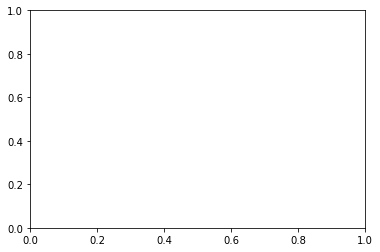

In [33]:
import operator
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

plt.scatter(X, y_pred, s=10)
plt.plot(X, y_pred, color='r')
plt.show()

In [21]:
# select the polynomial model with 2nd order terms and fit the model to entire dataframe
polynomial_features= PolynomialFeatures(degree=2)
X_poly = polynomial_features.fit_transform(X)

# split the data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size = 0.3, random_state = 42)

# because feature scales are enlarged by expansion the data should be standardized using Ridge regression
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.1, normalize=True)
ridge_reg.fit(X_train, y_train)
print("R2: %0.3f" %r2_score(y_test, ridge_reg.predict(X_test)))

model = LinearRegression()
model.fit(X_poly, y)
y_poly_pred = model.predict(X_poly)

y_poly_pred = ridge_reg.fit(X_poly, y)

# calculate the RMSE
rmse = np.sqrt(mean_squared_error(y, y_poly_pred))
r2 = r2_score(y, y_poly_pred)
print(rmse)
print(r2)

# scatter plot of data
plt.scatter(X, y, s=10)

# sort the values of x before plotting line
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X, y_poly_pred), key=sort_axis)
X, y_poly_pred = zip(*sorted_zip)
plt.plot(X, y_poly_pred, color='m')
plt.show()

R2: 0.994


TypeError: Expected sequence or array-like, got <class 'sklearn.linear_model._ridge.Ridge'>

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

def create_polynomial_regression_model(degree):
  "Creates a polynomial regression model for the given degree"
  
  poly_features = PolynomialFeatures(degree=degree)
  
  # transforms the existing features to higher degree features.
  X_train_poly = poly_features.fit_transform(X_train)
  
  # fit the transformed features to Linear Regression
  poly_model = LinearRegression()
  poly_model.fit(X_train_poly, Y_train)
  
  # predicting on training data-set
  y_train_predicted = poly_model.predict(X_train_poly)
  
  # predicting on test data-set
  y_test_predict = poly_model.predict(poly_features.fit_transform(X_test))
  
  # evaluating the model on training dataset
  rmse_train = np.sqrt(mean_squared_error(Y_train, y_train_predicted))
  r2_train = r2_score(Y_train, y_train_predicted)
  
  # evaluating the model on test dataset
  rmse_test = np.sqrt(mean_squared_error(Y_test, y_test_predict))
  r2_test = r2_score(Y_test, y_test_predict)
  
  print("The model performance for the training set")
  print("-------------------------------------------")
  print("RMSE of training set is {}".format(rmse_train))
  print("R2 score of training set is {}".format(r2_train))
  
  print("\n")
  
  print("The model performance for the test set")
  print("-------------------------------------------")
  print("RMSE of test set is {}".format(rmse_test))
  print("R2 score of test set is {}".format(r2_test))

## Training the model
Import the library and instantiate the model.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# initialize model
poly_model = PolynomialFeatures(degree=2, include_bias=False)

# fit the model to the training set
X_train_poly = poly_model.fit_transform(X_train, y_train)

Using indexation to return any value in X, say the 1st value

In [ ]:
X[:1]

The first thing to note here is I am not training the entire dataframe of X, so it might be more accurate to display the first row of X_train. The main point here is there are only 4 features. 

In [ ]:
X_train[:1]

It has taken the first value from row 150.

In [ ]:
X_train_poly[1]

Now repeating for the data contained in the 'X_train_poly' set and we can see that there are 14 values returned so it has created an array with 10 new features for a total of 14 features. This includes element-wise dot product values and some squared values (without going into to much detail). Both the original feature values for 'X1' to 'Xn' and the feature squared value from 'X_poly' are returned in this example. Now this new data matrix containing the additional features with the squared values has been created by expanding the number of features and the parameter weights (or coefficients), the linear regression model can be applied again to this new dataframe.

In [ ]:
# import the linear regression library first
from sklearn.linear_model import LinearRegression

# initialize the model
linear_regression = LinearRegression()

# fit the model but using the X_train_poly dataframe this time
linear_regression.fit(X_train_poly, y_train)

Also, the bias term (intercept) and coefficients are both attributes of the LinearRegression() model so I can examine these from the independent variable:

In [ ]:
linear_regression.intercept_
linear_regression.coef_

In [ ]:
# fit the model to the test set
X_test_poly = poly_model.fit_transform(X_test, y_test)

In [ ]:
X_test[:1]

In [ ]:
from sklearn.linear_model import LinearRegression

# initialize model
linear_regression = LinearRegression()

# fit the model again but using the test set this time
linear_regression.fit(X_test_poly, y_test)

In [ ]:
linear_regression.intercept_
linear_regression.coef_

## Model Validation
Here are some predictions using the test set data, before measuring their degree of variance and accuracy:

In [ ]:
# prediction
y_pred = linear_regression.predict(X_train_poly)
print("Price Predictions: ", linear_regression.predict(X_train_poly.iloc[:5]))

In [ ]:
# predicting price based on Open = C$35,000, High = C$40,000, Low = C$32,000 and Volume = 100bn
# linear_regression.predict([[35000, 40000, 32000, 100000000000]])

Validating the polynomial regression function with X and y training data and an attribute of 'degree=2' can be achieved using a mean squared error score and r-squared accuracy measure as before.

In [ ]:
from sklearn.metrics import r2_score

# model evaluation
score = r2_score(y_test, y_pred)
print(score)

In [ ]:
X_test_poly = poly_model.fit_transform(X_test)
print("R-squared: ", linear_regression.score(X_test_poly, y_test))

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

mse = mean_squared_error(y_test, y_pred)
print(mse)

rmse = np.sqrt(mse)
print(rmse)

So I can see the R-squared value is not as good as the previous score after trying polynomial regression with 'degree=2' squared terms. Having applied the Polynomial Features model and fitted it to the training set I have decided to save the data to a csv file.

In [ ]:
df.to_csv(r'C:/Users/lynst/Documents/GitHub/machine-learning-projects/machine-learning/X_poly.csv', index = False, header = True)

What if I change the parameter affecting the degree to which terms are multiplied to 'degree=3' in the polynomial equation?

## Training the model
Import the library and instantiate the model.

In [ ]:
# initialize model
poly_model = PolynomialFeatures(degree=3, include_bias=False)

# fit the model to the training set
X_train_poly = poly_model.fit_transform(X_train, y_train)

Applying the linear model once more:

In [ ]:
# import the linear regression library first
from sklearn.linear_model import LinearRegression

# initialize the model
linear_regression = LinearRegression()

# fit the model but using the X_poly dataframe this time
linear_regression.fit(X_train_poly, y_train)

Intercept and coefficients:

In [ ]:
linear_regression.intercept_
linear_regression.coef_

## Model Validation
This time for 'degree=3' terms the rmse score and r-squared measure based on the test sets give:

In [ ]:
# prediction
y_pred = linear_regression.predict(X_test)
print("Price Predictions: ", linear_regression.predict(X_test.iloc[:5]))

In [ ]:
# model evaluation
score = r2_score(y_test, y_pred)
print(score)

In [ ]:
X_test_poly = poly_model.fit_transform(X_test)
print("R-squared: ", linear_regression.score(X_test_poly, y_test))

In [ ]:
mse = mean_squared_error(y_test, y_pred)
print(mse)

rmse = np.sqrt(mse)
print(rmse)

This causes a significant drop in the R-squared value or the degree of fit to the line, so may not be the most accurate model to use. I have decided to see if I can improve the model's predictive power by electing to use a Decision Tree Regression model: "https://github.com/lynstanford/machine-learning-projects/tree/master/machine-learning/decision_tree.ipynb".